In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf_file

In [155]:
f = netcdf_file('data2.nc', mmap=False)

#### Extract the variables from the data

In [156]:
lon = f.variables['longitude'].data.copy()
lat = f.variables['latitude'].data.copy()
times = f.variables['time'].data.copy()

vel_x = f.variables['ugos'].data.copy().squeeze()
vel_y = f.variables['vgos'].data.copy().squeeze()

In [157]:
print("Lon shape",lon.shape)
print("Lat shape",lat.shape)
print("vel_x shape",vel_x.shape)
print("vel_y shape",vel_y.shape)

Lon shape (81,)
Lat shape (321,)
vel_x shape (321, 81)
vel_y shape (321, 81)


#### Fix missing data

In [179]:
from common_functions import interpolate_missing_point

imp_vel_x = interpolate_missing_point(vel_x, np.ma.masked_invalid(vel_x).mask)
imp_vel_y = interpolate_missing_point(vel_y, np.ma.masked_invalid(vel_y).mask)

#### Start with reducing size of the coord grid to make easier

In [180]:
imp_vel_x[0:321,0:321].shape

(321, 81)

In [181]:
[lon_min,lon_max,lat_min,lat_max] = [10,40,60,82]

lon = lon[lon_min:lon_max]
lat = lat[lat_min:lat_max]
imp_vel_x = imp_vel_x[lat_min:lat_max,lon_min:lon_max]
imp_vel_y = imp_vel_y[lat_min:lat_max,lon_min:lon_max]

In [182]:
imp_vel_x.shape

(22, 30)

In [183]:
lon

array([], dtype=float32)

#### Plot vel_x and vel_y to check all good

Text(0.5, 1.0, 'Vel_y')

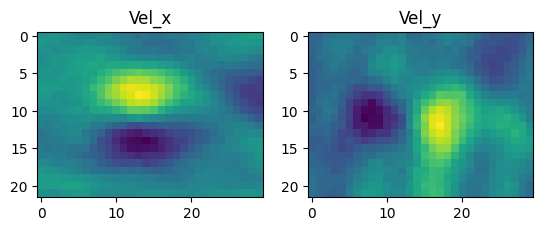

In [184]:
ax1 = plt.subplot(1,2,1)
ax1.imshow(imp_vel_x)
ax1.set_title("Vel_x")

ax2 = plt.subplot(1,2,2)
ax2.imshow(imp_vel_y)
ax2.set_title("Vel_y")

Are those little dots a problem??

#### Quiver plot for visualising velocities

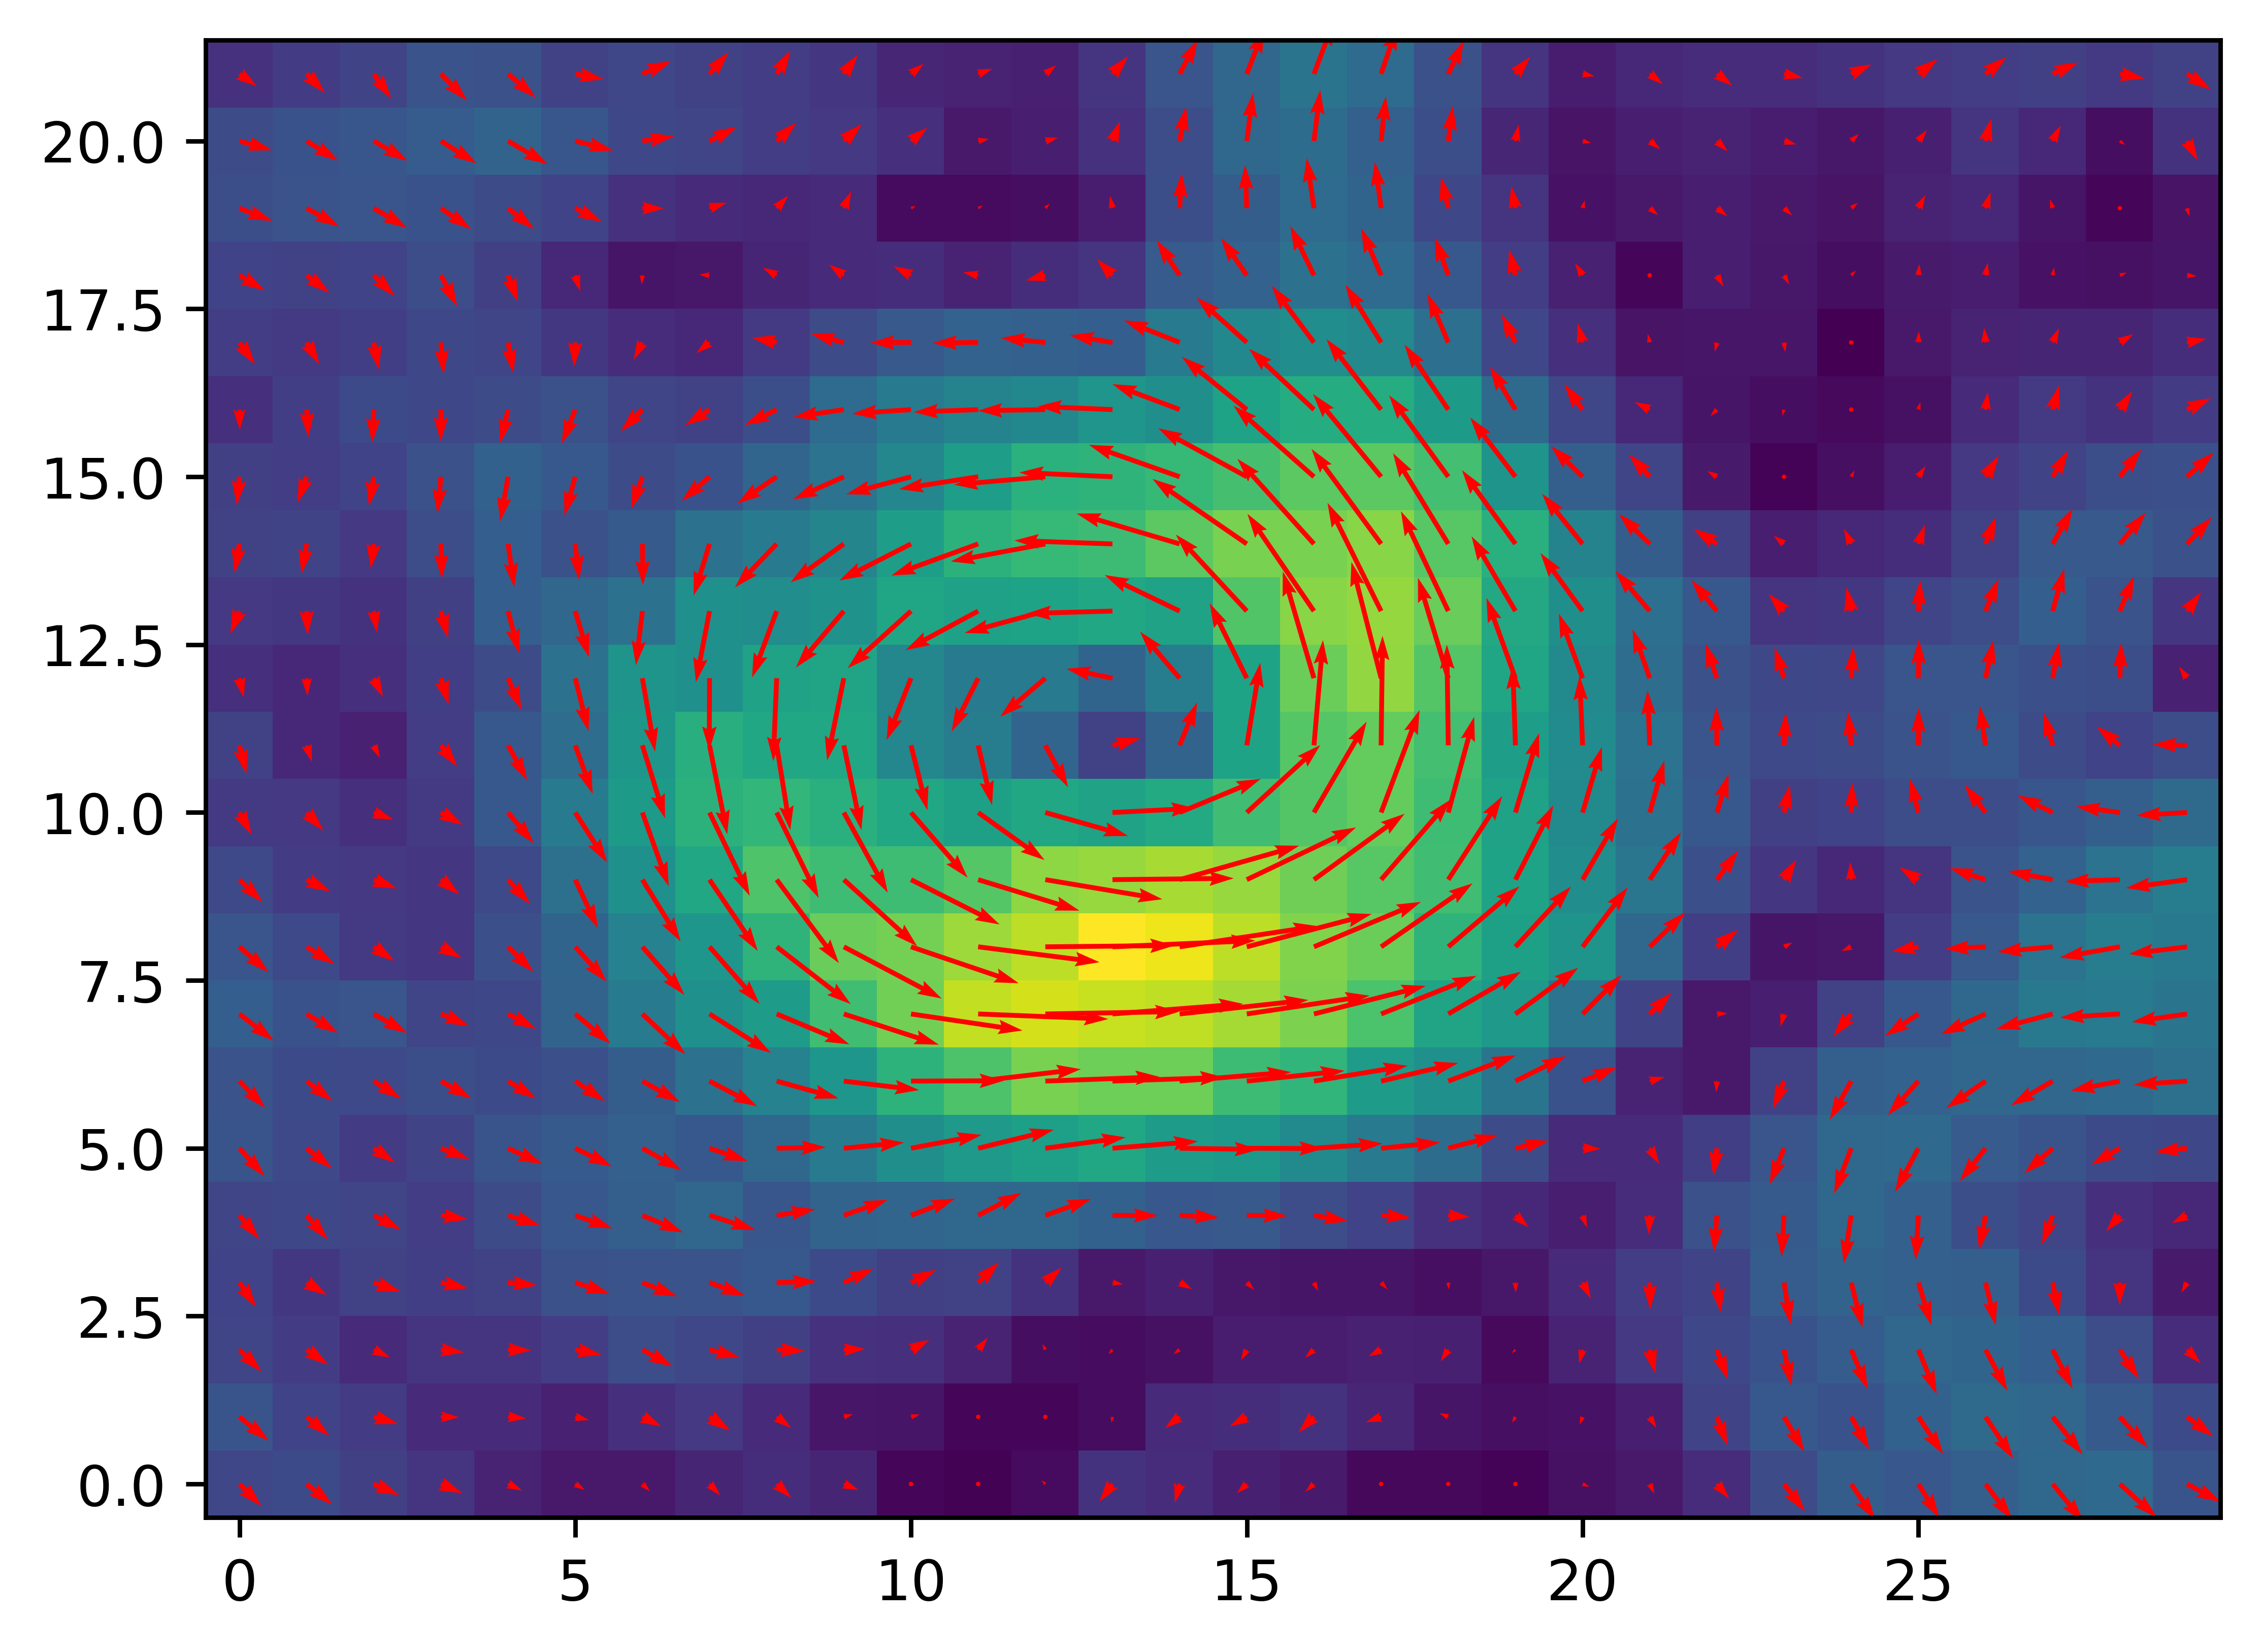

In [185]:
vel_magnitude = np.hypot(imp_vel_x, imp_vel_y)

# start with magnitude of velocity as background

plt.figure(dpi=800)
plt.imshow(vel_magnitude, origin='lower')
plt.quiver(imp_vel_x, imp_vel_y, color='r')